<a href="https://colab.research.google.com/github/kunal114/Machine-Learning-/blob/master/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import input csv file
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values
# print(x)
# print(y)
# print(type(x))
# x = x.reshape(1,-1)
# print(x,type(x),np.ndim(x))
# y = y.reshape(1,-1)
# print(y,type(y))

In [ ]:
# Handling missing value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit(x)
x = imp.transform(x)
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
# # Encoding

# #onehot
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=["encoder",OneHotEncoder(),[0]],remainder = "passthrough")
# x =np.array(ct.fit_transform(x))
# print(x)

# #label
# from sklearn.preprocessing import labelEncoder
# le = labelEncoder()
# y= le.fit_transform(y)
# print(y)

In [ ]:
#Splitting of data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)
print(x_train,x_test,y_train,y_test)

[[ 1.3]
 [ 5.3]
 [ 9.6]
 [ 3.2]
 [ 4. ]
 [ 2.2]
 [ 8.2]
 [ 3. ]
 [ 6.8]
 [ 3.7]
 [ 4. ]
 [10.5]
 [ 6. ]
 [ 7.1]
 [ 1.1]
 [ 3.2]
 [10.3]
 [ 2. ]
 [ 9. ]
 [ 8.7]
 [ 3.9]] [[4.9]
 [2.9]
 [7.9]
 [9.5]
 [5.9]
 [4.5]
 [4.1]
 [1.5]
 [5.1]] [ 46205.  83088. 112635.  54445.  56957.  39891. 113812.  60150.  91738.
  57189.  55794. 121872.  93940.  98273.  39343.  64445. 122391.  43525.
 105582. 109431.  63218.] [ 67938.  56642. 101302. 116969.  81363.  61111.  57081.  37731.  66029.]


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)
print(x_train,x_test)

[[-1.37223278]
 [-0.0287881 ]
 [ 1.41541493]
 [-0.73409656]
 [-0.46540762]
 [-1.06995773]
 [ 0.94520929]
 [-0.80126879]
 [ 0.47500366]
 [-0.56616597]
 [-0.46540762]
 [ 1.71768998]
 [ 0.20631472]
 [ 0.57576201]
 [-1.43940502]
 [-0.73409656]
 [ 1.65051775]
 [-1.13712996]
 [ 1.21389823]
 [ 1.11313988]
 [-0.49899374]] [[-0.16313257]
 [-0.83485491]
 [ 0.84445094]
 [ 1.38182881]
 [ 0.1727286 ]
 [-0.29747704]
 [-0.4318215 ]
 [-1.30506055]
 [-0.09596033]]


In [ ]:
#Training of SimpleLinearRegression model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_test,y_test)

LinearRegression()

In [ ]:
#Predict y for x_test
y_pred = slr.predict(x_test)
print(y_pred)

[ 69369.03837429  49510.26143667  99157.20378072 115044.22533081
  79298.4268431   65397.28298677  61425.52759924  35609.11758034
  71354.91606805]


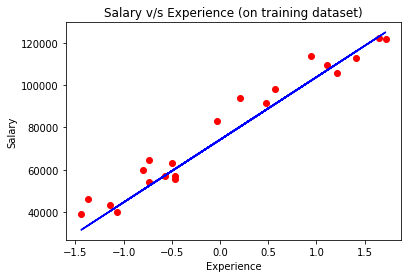

In [ ]:
#Compare the training data
plt.scatter(x_train,y_train,color='red') #plotting only traning points
plt.plot(x_train,slr.predict(x_train),color='blue') #plotting the regression line for the training sets
plt.title('Salary v/s Experience (on training dataset)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show() #to enable above graphics

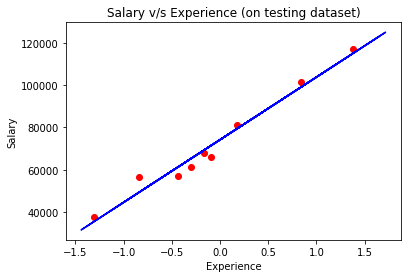

In [ ]:
#Compare y_test with y_pred
#Compare the testing data
plt.scatter(x_test,y_test,color='red') #plotting only testing points
plt.plot(x_train,slr.predict(x_train),color='blue') #plotting the regression line for the training sets
plt.title('Salary v/s Experience (on testing dataset)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show() #to enable above graphics

In [ ]:
print(slr.predict([[12]])) #predicting salary for a single entry
print(slr.coef_) #coeficient of simple linear regression fitting line
print(slr.intercept_) #intercept of simple linear regression fitting line

print(f"Equation: {slr.coef_[0]}X + {slr.intercept_}")

[428959.48516271]
[29563.96674673]
74191.88420199837
Equation: 29563.96674672629X + 74191.88420199837


In [ ]:
#Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred) 

15065760.589329958

In [ ]:
MSE = (np.square(np.subtract(y_test,y_pred))).mean()
MSEavg = np.square(np.subtract(y_test,y_pred.mean())).mean()
print(MSEavg, MSE)

530182477.50617284 15065760.589329958


In [ ]:
#R^2==r squared: more closer to 1, more better the model
import math
r= 1 - (MSE/MSEavg)
print(r)
print(math.sqrt(r))

0.9715838202345068
0.9856895151286266


In [ ]:
# R^2 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9715838202345068

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3419.5033396345298